In [1]:
%load_ext autoreload
%autoreload 2

import vix_calc
import sqlite3
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

In [80]:
conn = sqlite3.connect("../data_aggregation/flow_database.db")
conn.row_factory = vix_calc.my_row_factory
cursor = conn.cursor()

DT = '2022-01-07'

In [81]:
%%time
query = """
select
	open,
	close,
	date_of,
	date_of_close
from price_data

where symbol = 'SPY'
and date_of_close >= '2022-01-07'
and date_of_close <= '2023-01-13'
;
"""

cursor.execute(query)
data = cursor.fetchall()
data = pd.DataFrame.from_records(data)
data.head(3)

CPU times: total: 0 ns
Wall time: 1 ms


,open,close,date_of,date_of_close
0,476.30,466.09,2022-01-03,2022-01-07
1,462.70,464.72,2022-01-10,2022-01-14
2,459.74,437.98,2022-01-17,2022-01-21


In [82]:
VIX = vix_calc.main(DT)

calculating VIX for 2022-01-07
2022-01-31
2022-02-11


In [83]:
d = datetime.strptime(DT, '%Y-%m-%d')
forward_date = d + timedelta(days=365)
print(forward_date)

data['date_of_close'] = data.date_of_close.apply(pd.to_datetime)

2023-01-07 00:00:00


In [84]:
data['annual_'] = (data.date_of_close - d).dt.days / 365

data['vix_d'] = data.annual_.apply(lambda x: vix_calc.get_period_volatility(VIX, x))

start_close = data.iloc[0].close

data['price_up'] = (data.vix_d / 100 + 1) * start_close
data['price_down'] = (-data.vix_d / 100 + 1) * start_close

In [89]:
vix_calc.main(DT)

calculating VIX for 2022-01-07
2022-01-31
2022-02-11


18.11287154256035

In [85]:
data.head(4)

,open,close,date_of,date_of_close,annual_,vix_d,price_up,price_down
0,476.30,466.09,2022-01-03,2022-01-07,0.000000,0.000000,466.090000,466.090000
1,462.70,464.72,2022-01-10,2022-01-14,0.019178,2.508360,477.781216,454.398784
2,459.74,437.98,2022-01-17,2022-01-21,0.038356,3.547357,482.623876,449.556124
3,432.03,441.95,2022-01-24,2022-01-28,0.057534,4.344607,486.339780,445.840220


In [91]:
VIX

18.11287154256035

<AxesSubplot: xlabel='date_of_close'>

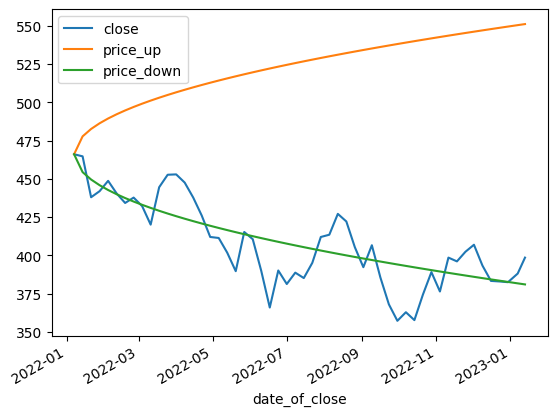

In [86]:
data.plot(x='date_of_close', y=['close', 'price_up', 'price_down'])

In [63]:
sns.lineplot(data=data, x='date_of_close', y=['close'])

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 23 and the vector passed to `y` has length 1.